In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
%matplotlib inline

In [103]:
# Code to Measure time taken by program to execute.
import time

# store starting time
begin = time.time()

In [104]:
df_total = pd.read_csv('df_total1.csv')
df_total

,Unnamed: 0,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,...,Sex,neuter/spay,adopted/non-adopted,Days_in_shelter,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,0,a786884,*brock,2019-01-03 04:19:00,2501 magin meadow dr in austin (tx),stray,normal,dog,2.000000,yes,...,male,yes,non-adopted,4.0,small,agreeable,family_dog,frequent,medium_high,hound_group
1,1,a706918,belle,2015-07-05 12:59:00,9409 bluegrass dr in austin (tx),stray,normal,dog,8.000000,no,...,female,yes,adopted,0.0,medium,pleaser,Not_define,medium,medium_low,sporting_group
2,2,a724273,runster,2016-04-14 06:43:00,2818 palomino trail in austin (tx),stray,normal,dog,0.916667,yes,...,male,yes,adopted,6.0,small,independent,apartment_friendly,rare,medium_high,hound_group
3,3,a665644,unknown,2013-10-21 07:59:00,austin (tx),stray,sick,cat,0.076660,yes,...,female,no,non-adopted,0.0,Unknown,Unknown,Not_define,Unknown,not_define,not_define
4,4,a682524,rio,2014-06-29 10:38:00,800 grove blvd in austin (tx),stray,normal,dog,4.000000,no,...,male,yes,adopted,2.0,large,pleaser,guard_dog,medium,high,working_group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,110490,a830164,unknown,2021-03-03 02:17:00,travis (tx),owner surrender,normal,dog,0.083333,yes,...,unknown,unknown,non-adopted,0.0,small,agreeable,family_dog,rare,medium_low,toy_group
109117,110491,a829701,pee wee,2021-02-21 02:56:00,16201 biltmore avenue in travis (tx),stray,normal,dog,3.000000,no,...,male,no,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109118,110492,a765174,carson,2018-01-14 11:31:00,austin (tx),owner surrender,normal,dog,0.083333,yes,...,male,yes,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109119,110493,a829868,remy,2021-02-25 11:40:00,valdez in austin (tx),stray,normal,dog,1.000000,no,...,male,yes,adopted,5.0,small,agreeable,family_dog,frequent,medium_high,hound_group


# Standard Clean

In [105]:
# csv created this
df_total = df_total.drop('Unnamed: 0',1)

# not conbine well with label coding

df_total = df_total.drop('Animal_ID',1) #@@@@@@@
df_total = df_total.drop('Name',1)
df_total = df_total.drop('Date of Birth',1)
df_total = df_total.drop('DateTime_Intake',1)
df_total = df_total.drop('DateTime_Outcome',1)
df_total = df_total.drop('Location',1)
df_total = df_total.drop('Found_Location',1)    #@@@@@@@@@
#df_total = df_total.drop('Age_upon_Intake_weeks',1)
#df_total = df_total.drop('Age_upon_Outcome_weeks',1)
#df_total = df_total.drop('Days in Shelter',1)

df_total.info()

C:\Users\diedr\AppData\Local\Temp\ipykernel_15424\1395291140.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Unnamed: 0',1)
C:\Users\diedr\AppData\Local\Temp\ipykernel_15424\1395291140.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Animal_ID',1) #@@@@@@@
C:\Users\diedr\AppData\Local\Temp\ipykernel_15424\1395291140.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Name',1)
C:\Users\diedr\AppData\Local\Temp\ipykernel_15424\1395291140.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Date of Birth',1)
C:\Users\diedr\AppData\Loca

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Intake_type           109121 non-null  object 
 1   Intake_Condition      109121 non-null  object 
 2   Animal_Type           109121 non-null  object 
 3   Age_upon_Intake       109121 non-null  float64
 4   Mix_Breed             109121 non-null  object 
 5   Primary_Breed         109121 non-null  object 
 6   Secondary_Breed       109121 non-null  object 
 7   Main_Color            109121 non-null  object 
 8   Secondary_Color       109121 non-null  object 
 9   Outcome_Type          109121 non-null  object 
 10  Outcome_Subtype       109121 non-null  object 
 11  Age_upon_Outcome      109121 non-null  float64
 12  Sex                   109121 non-null  object 
 13  neuter/spay           109121 non-null  object 
 14  adopted/non-adopted   109121 non-null  object 
 15  

In [106]:
cols_num = ['Age_upon_Intake','Age_upon_Outcome','Days_in_shelter']
cols_cat = ['Intake_type','Intake_Condition','Mix_Breed','Primary_Breed','Secondary_Breed','Main_Color','Secondary_Color','Sex','neuter/spay','Breed_size','Trainability','Breed_characteristic','Barking_level','activity_level','adopted/non-adopted','breed_group','Animal_Type']
df_total[cols_cat] = df_total[cols_cat].astype('category')
#col2 = ['DateTime_Intake','DateTime_Outcome','Date of Birth']
#df_total[col2] = df_total[col2].astype('datetime64[ns]')
df_total.info()

# modify cols_num and cols2 -> no datetime for now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Intake_type           109121 non-null  category
 1   Intake_Condition      109121 non-null  category
 2   Animal_Type           109121 non-null  category
 3   Age_upon_Intake       109121 non-null  float64 
 4   Mix_Breed             109121 non-null  category
 5   Primary_Breed         109121 non-null  category
 6   Secondary_Breed       109121 non-null  category
 7   Main_Color            109121 non-null  category
 8   Secondary_Color       109121 non-null  category
 9   Outcome_Type          109121 non-null  object  
 10  Outcome_Subtype       109121 non-null  object  
 11  Age_upon_Outcome      109121 non-null  float64 
 12  Sex                   109121 non-null  category
 13  neuter/spay           109121 non-null  category
 14  adopted/non-adopted   109121 non-nul

df_total.iloc[:,17]

X = df_total.iloc[:, [1, 2, 3]].values
y = df_total.iloc[:, 1].values

In [107]:
df_total = df_total.drop('Outcome_Type', axis = 1)
df_total = df_total.drop('Outcome_Subtype', axis = 1)

# Label encoder

In [108]:
df_num = df_total.drop(cols_cat, axis=1)

In [109]:
df_cat = df_total.drop(cols_num, axis=1)

In [110]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
for i in df_cat.columns:
    df_cat[i] = labelencoder.fit_transform(df_cat[i])

df_total = df_cat.join(df_num)
df_total

,Intake_type,Intake_Condition,Animal_Type,Mix_Breed,Primary_Breed,Secondary_Breed,Main_Color,Secondary_Color,Sex,neuter/spay,adopted/non-adopted,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group,Age_upon_Intake,Age_upon_Outcome,Days_in_shelter
0,4,5,2,1,35,126,55,37,1,2,1,3,1,2,1,2,1,2.000000,2.00,4.0
1,4,5,2,0,131,126,56,34,0,2,0,2,4,0,3,3,5,8.000000,8.00,0.0
2,4,5,2,1,32,126,46,51,1,2,0,3,3,1,4,2,1,0.916667,1.00,6.0
3,4,9,1,1,119,126,21,37,0,0,1,0,0,0,0,4,3,0.076660,0.08,0.0
4,4,5,2,0,116,16,51,29,1,2,0,1,4,3,3,0,9,4.000000,4.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,2,5,2,1,266,126,2,51,2,1,1,3,1,2,4,3,8,0.083333,0.08,0.0
109117,4,5,2,0,89,126,15,37,1,0,0,5,3,1,5,3,8,3.000000,3.00,0.0
109118,2,5,2,1,89,126,51,51,1,2,0,5,3,1,5,3,8,0.083333,0.17,0.0
109119,4,5,2,0,35,109,55,37,1,2,0,3,1,2,1,2,1,1.000000,1.00,5.0


# One Hot encoder

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_cat).toarray())      # modify here df_num for df_total

#df_total = enc_df
#df_total
df_codes = enc_df.join(df_num)
df_codes

# second version

# One-hot encode the data using pandas get_dummies
df_codes = pd.get_dummies(df_cat)
df_total = df_codes.join(df_num)

# Display the first 5 rows of the last 12 columns
df_total.head(5)

# Cleaning target variable

In [111]:
df_total['adopted/non-adopted'].unique()

# unknown value is found in 21 rows

array([1, 0, 2])

In [112]:
index_names = df_total[df_total['adopted/non-adopted'] == 2 ].index
index_names

Int64Index([ 13869,  29677,  31621,  31898,  32860,  39609,  48814,  52620,
             54235,  57107,  72673,  74858,  75612,  79431,  90548,  93543,
             93795,  95675, 100101, 103241, 108841],
           dtype='int64')

In [113]:
df_total.drop(index_names, inplace=True)

In [114]:
df_total['adopted/non-adopted'].unique()

array([1, 0])

# split

X = df_total.iloc[:, df_total.columns != 'adopted/non-adopted' ].values
y = df_total['adopted/non-adopted'].values

In [115]:
X = df_total.drop('adopted/non-adopted', 1)
y = df_total['adopted/non-adopted']
X.head()

C:\Users\diedr\AppData\Local\Temp\ipykernel_15424\488732468.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_total.drop('adopted/non-adopted', 1)


,Intake_type,Intake_Condition,Animal_Type,Mix_Breed,Primary_Breed,Secondary_Breed,Main_Color,Secondary_Color,Sex,neuter/spay,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group,Age_upon_Intake,Age_upon_Outcome,Days_in_shelter
0,4,5,2,1,35,126,55,37,1,2,3,1,2,1,2,1,2.000000,2.00,4.0
1,4,5,2,0,131,126,56,34,0,2,2,4,0,3,3,5,8.000000,8.00,0.0
2,4,5,2,1,32,126,46,51,1,2,3,3,1,4,2,1,0.916667,1.00,6.0
3,4,9,1,1,119,126,21,37,0,0,0,0,0,0,4,3,0.076660,0.08,0.0
4,4,5,2,0,116,16,51,29,1,2,1,4,3,3,0,9,4.000000,4.00,2.0


In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Balancing 1 (under-sampling)

- This method work well when the data is substantial and relatively equal in the amount of data from each target class

In [117]:
y_train

76807    1
43782    0
14176    0
31617    1
66545    0
        ..
21244    0
45897    1
42619    0
43573    1
68278    1
Name: adopted/non-adopted, Length: 87280, dtype: int32

In [118]:
y_train.value_counts()

0    51559
1    35721
Name: adopted/non-adopted, dtype: int64

In [119]:
y.value_counts()

0    64338
1    44762
Name: adopted/non-adopted, dtype: int64

In [120]:
from imblearn.datasets import make_imbalance

X_train, y_train = make_imbalance(X_train, y_train, sampling_strategy={0: 30000, 1: 30000},random_state=14)

# It was set to 30000 because of the non-adopted value:1 in y_train

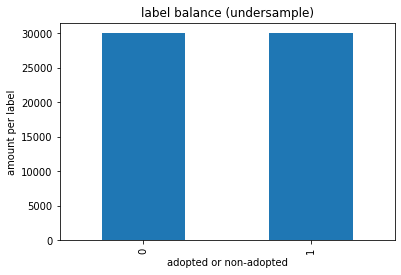

In [121]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance (undersample)')
plt.xlabel('adopted or non-adopted')
plt.ylabel('amount per label')
plt.show()

# Model

In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [123]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [124]:
y_pred = classifier.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cm

array([[10663,  2116],
       [ 2222,  6819]], dtype=int64)

In [126]:
print('Accuracy:', ac)

Accuracy: 0.8011915673693859


# K-fold Cross-validation

In [127]:
# evaluate KNN model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [128]:
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
#model = LogisticRegression()
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.806 (0.008)


# Classification Report

In [129]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     12779
           1       0.76      0.75      0.76      9041

    accuracy                           0.80     21820
   macro avg       0.80      0.79      0.79     21820
weighted avg       0.80      0.80      0.80     21820



# Log Loss

In [130]:
# Cross Validation Classification LogLoss
import pandas
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -1.905 (0.202)


In [131]:
# program body ends

# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

Total runtime of the program is 36.26865291595459


# KNN - Selected features

In [215]:
# Code to Measure time taken by program to execute.
import time

# store starting time
begin2 = time.time()

In [216]:
df_total2 = pd.read_csv('df_total1.csv')
df_total2

,Unnamed: 0,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,...,Sex,neuter/spay,adopted/non-adopted,Days_in_shelter,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,0,a786884,*brock,2019-01-03 04:19:00,2501 magin meadow dr in austin (tx),stray,normal,dog,2.000000,yes,...,male,yes,non-adopted,4.0,small,agreeable,family_dog,frequent,medium_high,hound_group
1,1,a706918,belle,2015-07-05 12:59:00,9409 bluegrass dr in austin (tx),stray,normal,dog,8.000000,no,...,female,yes,adopted,0.0,medium,pleaser,Not_define,medium,medium_low,sporting_group
2,2,a724273,runster,2016-04-14 06:43:00,2818 palomino trail in austin (tx),stray,normal,dog,0.916667,yes,...,male,yes,adopted,6.0,small,independent,apartment_friendly,rare,medium_high,hound_group
3,3,a665644,unknown,2013-10-21 07:59:00,austin (tx),stray,sick,cat,0.076660,yes,...,female,no,non-adopted,0.0,Unknown,Unknown,Not_define,Unknown,not_define,not_define
4,4,a682524,rio,2014-06-29 10:38:00,800 grove blvd in austin (tx),stray,normal,dog,4.000000,no,...,male,yes,adopted,2.0,large,pleaser,guard_dog,medium,high,working_group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,110490,a830164,unknown,2021-03-03 02:17:00,travis (tx),owner surrender,normal,dog,0.083333,yes,...,unknown,unknown,non-adopted,0.0,small,agreeable,family_dog,rare,medium_low,toy_group
109117,110491,a829701,pee wee,2021-02-21 02:56:00,16201 biltmore avenue in travis (tx),stray,normal,dog,3.000000,no,...,male,no,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109118,110492,a765174,carson,2018-01-14 11:31:00,austin (tx),owner surrender,normal,dog,0.083333,yes,...,male,yes,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109119,110493,a829868,remy,2021-02-25 11:40:00,valdez in austin (tx),stray,normal,dog,1.000000,no,...,male,yes,adopted,5.0,small,agreeable,family_dog,frequent,medium_high,hound_group


In [217]:
cols_num2 = ['Age_upon_Intake','Age_upon_Outcome','Days_in_shelter']
cols_cat2 = ['Intake_type','Intake_Condition','Mix_Breed','Primary_Breed','Secondary_Breed','Main_Color','Secondary_Color','Sex','neuter/spay','Breed_size','Trainability','Breed_characteristic','Barking_level','activity_level','adopted/non-adopted','breed_group','Animal_Type']
df_total2[cols_cat2] = df_total2[cols_cat2].astype('category')
#col2 = ['DateTime_Intake','DateTime_Outcome','Date of Birth']
#df_total[col2] = df_total[col2].astype('datetime64[ns]')
df_total2.info()

# modify cols_num and cols2 -> no datetime for now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Unnamed: 0            109121 non-null  int64   
 1   Animal_ID             109121 non-null  object  
 2   Name                  109120 non-null  object  
 3   DateTime_Intake       109121 non-null  object  
 4   Found_Location        109121 non-null  object  
 5   Intake_type           109121 non-null  category
 6   Intake_Condition      109121 non-null  category
 7   Animal_Type           109121 non-null  category
 8   Age_upon_Intake       109121 non-null  float64 
 9   Mix_Breed             109121 non-null  category
 10  Primary_Breed         109121 non-null  category
 11  Secondary_Breed       109121 non-null  category
 12  Main_Color            109121 non-null  category
 13  Secondary_Color       109121 non-null  category
 14  DateTime_Outcome      109121 non-nul

In [218]:
df_total2.columns

Index(['Unnamed: 0', 'Animal_ID', 'Name', 'DateTime_Intake', 'Found_Location',
       'Intake_type', 'Intake_Condition', 'Animal_Type', 'Age_upon_Intake',
       'Mix_Breed', 'Primary_Breed', 'Secondary_Breed', 'Main_Color',
       'Secondary_Color', 'DateTime_Outcome', 'Date of Birth', 'Outcome_Type',
       'Outcome_Subtype', 'Age_upon_Outcome', 'Location', 'Sex', 'neuter/spay',
       'adopted/non-adopted', 'Days_in_shelter', 'Breed_size', 'Trainability',
       'Breed_characteristic', 'Barking_level', 'activity_level',
       'breed_group'],
      dtype='object')

In [219]:
# Split and features selected

not_selected =['Unnamed: 0', 'Animal_ID', 'Name', 'DateTime_Intake', 'Found_Location',
                'Primary_Breed', 'Secondary_Breed', 'Main_Color',
               'Secondary_Color', 'DateTime_Outcome', 'Date of Birth',
                 'Location',
               'Breed_size', 'Trainability',
               'Breed_characteristic', 'Barking_level',
               'breed_group',
               'Outcome_Type','Outcome_Subtype',
               'activity_level']
df_total2 = df_total2.drop(not_selected, 1)
df_total2

C:\Users\diedr\AppData\Local\Temp\ipykernel_15424\3248623187.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total2 = df_total2.drop(not_selected, 1)


,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,Age_upon_Outcome,Sex,neuter/spay,adopted/non-adopted,Days_in_shelter
0,stray,normal,dog,2.000000,yes,2.00,male,yes,non-adopted,4.0
1,stray,normal,dog,8.000000,no,8.00,female,yes,adopted,0.0
2,stray,normal,dog,0.916667,yes,1.00,male,yes,adopted,6.0
3,stray,sick,cat,0.076660,yes,0.08,female,no,non-adopted,0.0
4,stray,normal,dog,4.000000,no,4.00,male,yes,adopted,2.0
...,...,...,...,...,...,...,...,...,...,...
109116,owner surrender,normal,dog,0.083333,yes,0.08,unknown,unknown,non-adopted,0.0
109117,stray,normal,dog,3.000000,no,3.00,male,no,adopted,0.0
109118,owner surrender,normal,dog,0.083333,yes,0.17,male,yes,adopted,0.0
109119,stray,normal,dog,1.000000,no,1.00,male,yes,adopted,5.0


# Individual test afterward

In [220]:
df_total3 = df_total2
df_total3

,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,Age_upon_Outcome,Sex,neuter/spay,adopted/non-adopted,Days_in_shelter
0,stray,normal,dog,2.000000,yes,2.00,male,yes,non-adopted,4.0
1,stray,normal,dog,8.000000,no,8.00,female,yes,adopted,0.0
2,stray,normal,dog,0.916667,yes,1.00,male,yes,adopted,6.0
3,stray,sick,cat,0.076660,yes,0.08,female,no,non-adopted,0.0
4,stray,normal,dog,4.000000,no,4.00,male,yes,adopted,2.0
...,...,...,...,...,...,...,...,...,...,...
109116,owner surrender,normal,dog,0.083333,yes,0.08,unknown,unknown,non-adopted,0.0
109117,stray,normal,dog,3.000000,no,3.00,male,no,adopted,0.0
109118,owner surrender,normal,dog,0.083333,yes,0.17,male,yes,adopted,0.0
109119,stray,normal,dog,1.000000,no,1.00,male,yes,adopted,5.0


# labeling (features selected)

In [221]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
for i in df_total2.columns:
    df_total2[i] = labelencoder.fit_transform(df_total2[i])

#df_total2 = df_cat.join(df_num)
df_total2

,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,Age_upon_Outcome,Sex,neuter/spay,adopted/non-adopted,Days_in_shelter
0,4,5,2,18,1,17,1,2,1,4
1,4,5,2,24,0,23,0,2,0,0
2,4,5,2,16,1,16,1,2,0,6
3,4,9,1,4,1,4,0,0,1,0
4,4,5,2,20,0,19,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...
109116,2,5,2,5,1,4,2,1,1,0
109117,4,5,2,19,0,18,1,0,0,0
109118,2,5,2,5,1,6,1,2,0,0
109119,4,5,2,17,0,16,1,2,0,5


# Cleaning (features selection)

In [222]:
df_total2['adopted/non-adopted'].unique()

# unknown value is found in 21 rows

array([1, 0, 2])

In [223]:
index_names2 = df_total2[df_total2['adopted/non-adopted'] == 2 ].index
index_names2

Int64Index([ 13869,  29677,  31621,  31898,  32860,  39609,  48814,  52620,
             54235,  57107,  72673,  74858,  75612,  79431,  90548,  93543,
             93795,  95675, 100101, 103241, 108841],
           dtype='int64')

In [224]:
df_total2.drop(index_names, inplace=True)

In [225]:
df_total2['adopted/non-adopted'].unique()

array([1, 0])

# split (features selected)

In [226]:
# Split

X2 = df_total2.drop('adopted/non-adopted', 1)
y2 = df_total2['adopted/non-adopted']
X2.head()

C:\Users\diedr\AppData\Local\Temp\ipykernel_15424\23033182.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X2 = df_total2.drop('adopted/non-adopted', 1)


,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,Age_upon_Outcome,Sex,neuter/spay,Days_in_shelter
0,4,5,2,18,1,17,1,2,4
1,4,5,2,24,0,23,0,2,0
2,4,5,2,16,1,16,1,2,6
3,4,9,1,4,1,4,0,0,0
4,4,5,2,20,0,19,1,2,2


In [227]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=0)

# Balancing (features selected)

In [228]:
y_train2

76807    1
43782    0
14176    0
31617    1
66545    0
        ..
21244    0
45897    1
42619    0
43573    1
68278    1
Name: adopted/non-adopted, Length: 87280, dtype: int32

In [229]:
y_train2.value_counts()

0    51559
1    35721
Name: adopted/non-adopted, dtype: int64

In [230]:
y2.value_counts()

0    64338
1    44762
Name: adopted/non-adopted, dtype: int64

In [231]:
from imblearn.datasets import make_imbalance

X_train2, y_train2 = make_imbalance(X_train2, y_train2, sampling_strategy={0: 30000, 1: 30000},random_state=14)

# It was set to 30000 because of the non-adopted value:1 in y_train

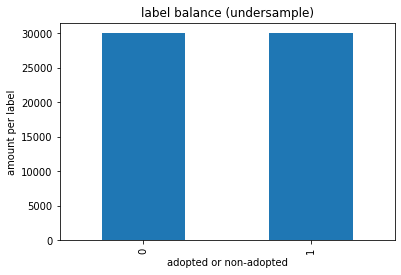

In [232]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance (undersample)')
plt.xlabel('adopted or non-adopted')
plt.ylabel('amount per label')
plt.show()

# Model

In [233]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [234]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=4)

In [235]:
y_pred2 = classifier.predict(X_test2)

In [236]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm2 = confusion_matrix(y_test2, y_pred2)
ac2 = accuracy_score(y_test2,y_pred2)
cm2

array([[11904,   875],
       [ 2989,  6052]], dtype=int64)

In [237]:
print('Accuracy:', ac2)

Accuracy: 0.8229147571035748


# K-fold cross validation

In [238]:
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
#model = LogisticRegression()
model = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
# evaluate model
scores = cross_val_score(model, X_test2, y_test2, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.832 (0.008)


In [239]:
from sklearn.metrics import classification_report

report2 = classification_report(y_test2, y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     12779
           1       0.87      0.67      0.76      9041

    accuracy                           0.82     21820
   macro avg       0.84      0.80      0.81     21820
weighted avg       0.83      0.82      0.82     21820



In [240]:
# Cross Validation Classification LogLoss
import pandas
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
scoring = 'neg_log_loss'
results2 = model_selection.cross_val_score(model, X_test2, y_test2, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results2.mean(), results2.std()))

Logloss: -1.752 (0.177)


In [241]:
# program body ends

# store end time
end2 = time.time()

# total time taken
print(f"Total runtime of the program is {end2 - begin2}")

Total runtime of the program is 6.921505928039551


# Individual test

intake type:
4 = stray

intake condition
5 = normal

animal type
2 = dog

age intake
18 = 2 years

mix
1 = yes

age outcome
17 = 2 years plus something

sex
1 = male

neuter

2 = yes
0 = no

day in shelter
integral number 4.00 --> 4

https://stackoverflow.com/questions/58217005/how-to-reverse-label-encoder-from-sklearn-for-multiple-columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Unnamed: 0            109121 non-null  int64   
 1   Animal_ID             109121 non-null  object  
 2   Name                  109120 non-null  object  
 3   DateTime_Intake       109121 non-null  object  
 4   Found_Location        109121 non-null  object  
 5   Intake_type           109121 non-null  category
 6   Intake_Condition      109121 non-null  category
 7   Animal_Type           109121 non-null  category
 8   Age_upon_Intake       109121 non-null  float64 
 9   Mix_Breed             109121 non-null  category
 10  Primary_Breed         109121 non-null  category
 11  Secondary_Breed       109121 non-null  category
 12  Main_Color            109121 non-null  category
 13  Secondary_Color       109121 non-null  category
 14  DateTime_Outcome      109121 non-nul

C:\Users\diedr\AppData\Local\Temp\ipykernel_15424\3325880243.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total3 = df_total3.drop(not_selected, 1)
C:\Users\diedr\AppData\Local\Temp\ipykernel_15424\3325880243.py:61: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X3 = df_total3.drop('adopted/non-adopted', 1)


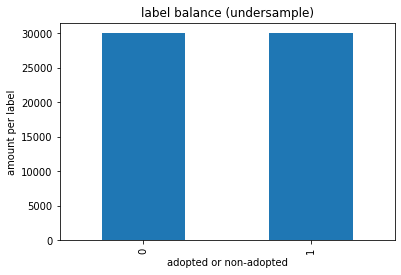

In [242]:
df_total3 = pd.read_csv('df_total1.csv')
df_total3
cols_num3 = ['Age_upon_Intake', 'Age_upon_Outcome', 'Days_in_shelter']
cols_cat3 = ['Intake_type', 'Intake_Condition', 'Mix_Breed', 'Primary_Breed', 'Secondary_Breed', 'Main_Color',
             'Secondary_Color', 'Sex', 'neuter/spay', 'Breed_size', 'Trainability', 'Breed_characteristic',
             'Barking_level', 'activity_level', 'adopted/non-adopted', 'breed_group', 'Animal_Type']
df_total3[cols_cat3] = df_total3[cols_cat3].astype('category')
#col2 = ['DateTime_Intake','DateTime_Outcome','Date of Birth']
#df_total[col2] = df_total[col2].astype('datetime64[ns]')
df_total3.info()

# modify cols_num and cols2 -> no datetime for now
df_total3.columns
# Split and features selected

not_selected = ['Unnamed: 0', 'Animal_ID', 'Name', 'DateTime_Intake', 'Found_Location',
                'Primary_Breed', 'Secondary_Breed', 'Main_Color',
                'Secondary_Color', 'DateTime_Outcome', 'Date of Birth',
                'Location',
                'Breed_size', 'Trainability',
                'Breed_characteristic', 'Barking_level',
                'breed_group',
                'Outcome_Type', 'Outcome_Subtype',
                'activity_level']
df_total3 = df_total3.drop(not_selected, 1)
df_total3

# labeling (features selected)
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# creating instance of labelencoder
labelencoder = LabelEncoder()
le = preprocessing.LabelEncoder()

# Assigning numerical values and storing in another column
#for i in df_total3.columns:
 #   df_total3[i] = le.fit_transform(df_total3[i])
def fitting(z):
    for i in z.columns: z[i] = le.fit_transform(z[i])

fitting(df_total3)

#le_fitted = le.fit_transform(df_total3)

# change this line to continue line

#df_total2 = df_cat.join(df_num)
df_total3
# Cleaning (features selection)
df_total3['adopted/non-adopted'].unique()

# unknown value is found in 21 rows
index_names3 = df_total3[df_total3['adopted/non-adopted'] == 2].index
index_names3
df_total3.drop(index_names3, inplace=True)
df_total3['adopted/non-adopted'].unique()
# split (features selected)
# Split

X3 = df_total3.drop('adopted/non-adopted', 1)
y3 = df_total3['adopted/non-adopted']
X3.head()
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=0)
# Balancing (features selected)
y_train3
y_train3.value_counts()
y3.value_counts()
from imblearn.datasets import make_imbalance

X_train3, y_train3 = make_imbalance(X_train3, y_train3, sampling_strategy={0: 30000, 1: 30000}, random_state=14)

# It was set to 30000 because of the non-adopted value:1 in y_train
y_train3.value_counts().plot(kind='bar')
plt.title('label balance (undersample)')
plt.xlabel('adopted or non-adopted')
plt.ylabel('amount per label')
plt.show()
# Model
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)


X2 = df_total2.drop('adopted/non-adopted', 1)
y2 = df_total2['adopted/non-adopted']
print(X2.shape, y2.shape)

inverted = le.inverse_transform(np.array(fitting(df_total3)))
inverted

In [243]:
# fit a logistic regression on the training dataset
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

# define model
model3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# fit model
model3.fit(X3, y3)
# make predictions
yhat = model3.predict(X3)
# evaluate predictions
acc = accuracy_score(y3, yhat)
print(acc)

0.8658753437213565


In [244]:
df_total2.columns

Index(['Intake_type', 'Intake_Condition', 'Animal_Type', 'Age_upon_Intake',
       'Mix_Breed', 'Age_upon_Outcome', 'Sex', 'neuter/spay',
       'adopted/non-adopted', 'Days_in_shelter'],
      dtype='object')

In [245]:
df_total2['Intake_type'].unique()

array([4, 2, 3, 5, 1, 0])

In [246]:
new_input = [4,5,2,18,1,17,1,0,1,30]

[4,5,2,4,1,3,1,0,50]

[4, 5, 2, 4, 1, 3, 1, 0, 50]

In [247]:
['Intake_type', 'Intake_Condition', 'Animal_Type', 'Age_upon_Intake',
 'Mix_Breed', 'Age_upon_Outcome', 'Sex', 'neuter/spay',
 'Days_in_shelter']

['Intake_type',
 'Intake_Condition',
 'Animal_Type',
 'Age_upon_Intake',
 'Mix_Breed',
 'Age_upon_Outcome',
 'Sex',
 'neuter/spay',
 'Days_in_shelter']

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df = ["paris", "paris", "tokyo", "amsterdam"]

le_fitted = le.fit_transform(df)

inverted = le.inverse_transform(le_fitted)

print(inverted)

In [248]:
x = np.array([
    [4,5,2,24,1,24,1,0,50]
              ])

dataframe = pd.DataFrame.from_records(x)
dataframe

,0,1,2,3,4,5,6,7,8
0,4,5,2,24,1,24,1,0,50


In [249]:
# get prediction for new input
new_output = model.predict(dataframe)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

prediction_test = labelencoder.inverse_transform(df_total3)
prediction_test

In [ ]:
print(new_input,new_output)